In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from collections import Counter
from sklearn.metrics import classification_report, confusion_matrix

In [20]:
true = pd.read_csv('/content/True.csv', engine="python", on_bad_lines="skip")
print(true.shape)
true.sample(5)

(21417, 4)


,title,text,subject,date
3634,Trump's budget proposes converting some milita...,WASHINGTON (Reuters) - The Trump administratio...,politicsNews,"May 23, 2017"
3769,Senate intelligence panel seeks more details f...,WASHINGTON (Reuters) - The U.S. Senate intelli...,politicsNews,"May 16, 2017"
9933,"Cyber as big a threat as Iran, North Korean IC...",WASHINGTON (Reuters) - Constant cyber attacks ...,politicsNews,"April 14, 2016"
5090,Trump says he is working on plan to bring down...,WASHINGTON (Reuters) - President Donald Trump ...,politicsNews,"March 7, 2017"
14773,Russian Twitter accounts promoted Brexit ahead...,LONDON (Reuters) - Russian Twitter accounts po...,worldnews,"November 15, 2017"


In [23]:
fake = pd.read_csv('Fake.csv', engine="python", on_bad_lines="skip")
print(fake.shape)
fake.sample(5)

(23481, 4)


,title,text,subject,date
2792,WATCH: Father Of Slain Muslim-American Soldie...,Donald Trump just got his ass handed to him by...,News,"January 29, 2017"
17727,BOOM! SARAH HUCKABEE SANDERS Sets Media Straig...,Daily Caller The revelation on Monday that f...,left-news,"Oct 30, 2017"
11776,SAVAGE ANTI-TRUMP PROTESTERS Knock Out Innocen...,AIRPORTS ACROSS THE COUNTRY were inundated wit...,politics,"Jan 30, 2017"
19051,COMPANY FIRES DEMOCRAT After Receiving Letter ...,Here is the screen shot we took of his vile an...,left-news,"Mar 2, 2017"
7594,Sanders Campaign Fights Back After Ohio Bans ...,"Twenty-two states, including the District of ...",News,"March 9, 2016"


In [24]:
fake["label"] = 1
true["label"] = 0

df = pd.concat([fake, true], ignore_index=True)
df = df.sample(frac=1, random_state=42).reset_index(drop=True)

In [25]:
print("Shape:", df.shape)
df.head()

Shape: (44898, 5)


,title,text,subject,date,label
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0


<Axes: title={'center': 'Class Distribution'}, xlabel='label'>

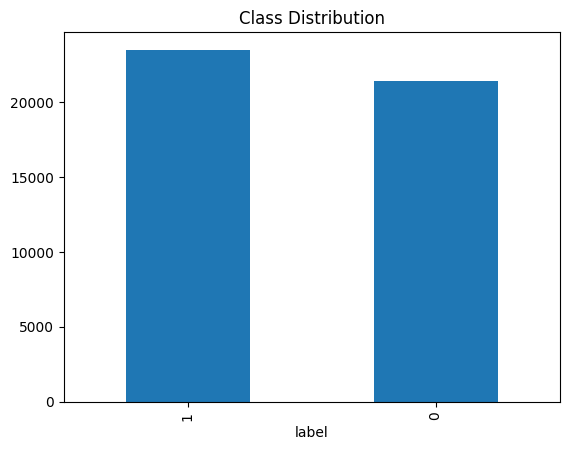

In [26]:
df["label"].value_counts().plot(kind='bar', title='Class Distribution')

<Axes: title={'center': 'Subject Distribution'}, xlabel='subject'>

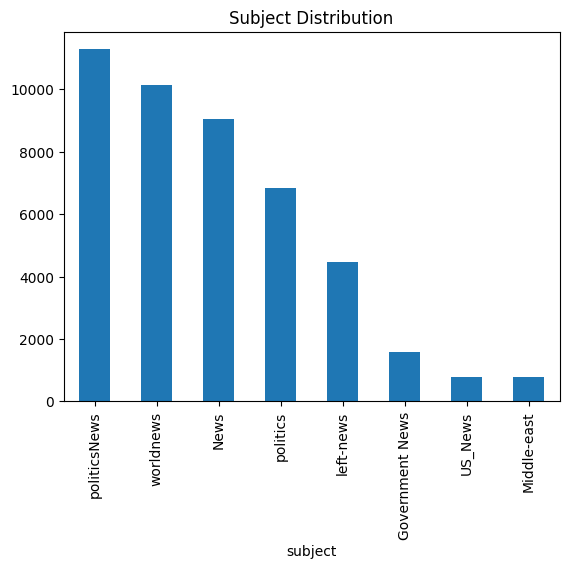

In [27]:
df["subject"].value_counts().plot(kind='bar', title='Subject Distribution')

<Axes: title={'center': 'Subject Distribution'}, ylabel='count'>

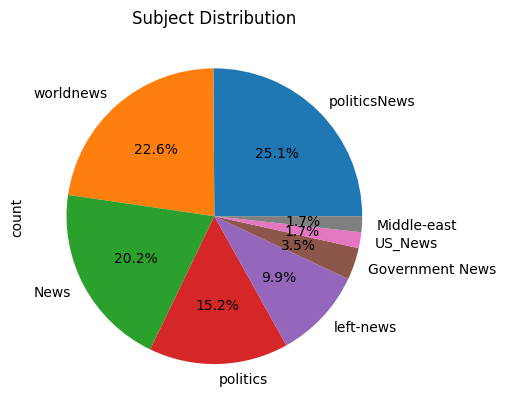

In [28]:
df["subject"].value_counts().plot.pie(autopct='%1.1f%%', title='Subject Distribution')

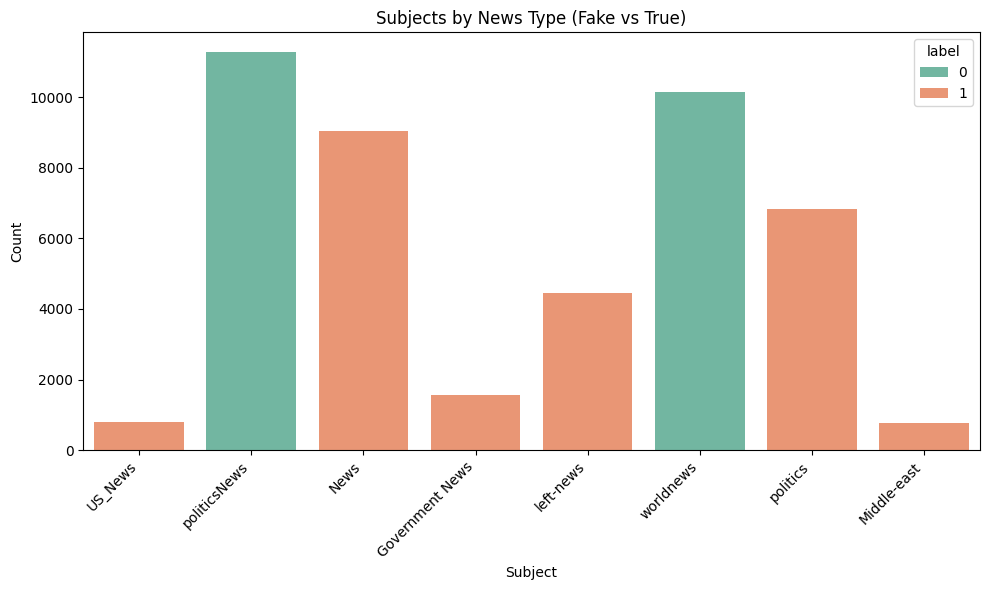

In [29]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='subject', hue='label', palette='Set2')
plt.title("Subjects by News Type (Fake vs True)")
plt.xlabel("Subject")
plt.ylabel("Count")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

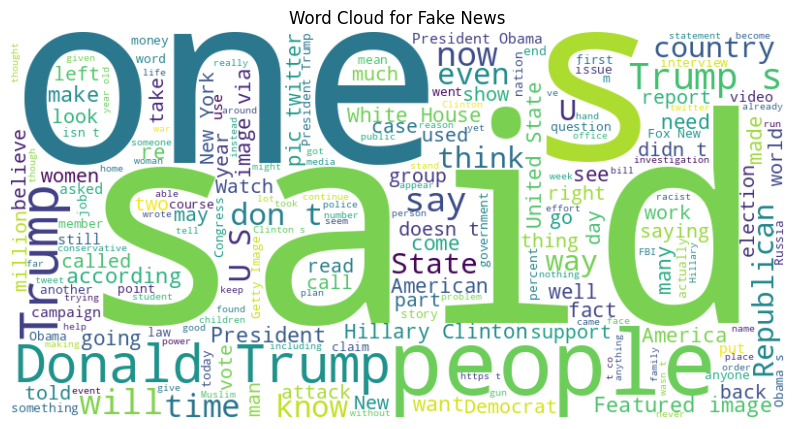

In [30]:
text = " ".join(df[df['label']==1]['text'])
wc = WordCloud(width=800, height=400, background_color="white").generate(text)

plt.figure(figsize=(10,6))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Fake News")
plt.show()

In [31]:
df.isnull().sum()

,0
title,0
text,0
subject,0
date,0
label,0


In [36]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [32]:
blanks = df[df["text"].astype(str).str.isspace()].index.tolist()
df = df[df["text"].astype(str).str.strip() != ""].reset_index(drop=True)

In [37]:
stop_words = set(stopwords.words('english'))

lemmatizer = WordNetLemmatizer()
stemmer = PorterStemmer()

def clean_text(text, use_lemmatization=True, use_stemming=False):

    text = text.lower()
    text = re.sub(r'[^a-z\s]', ' ', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stop_words]
    if use_lemmatization:
        tokens = [lemmatizer.lemmatize(word) for word in tokens]
    if use_stemming:
        tokens = [stemmer.stem(word) for word in tokens]

    return " ".join(tokens)

df["clean_text"] = df["text"].apply(clean_text)

In [38]:
df.head()

,title,text,subject,date,label,clean_text
0,Ben Stein Calls Out 9th Circuit Court: Committ...,"21st Century Wire says Ben Stein, reputable pr...",US_News,"February 13, 2017",1,st century wire say ben stein reputable profes...
1,Trump drops Steve Bannon from National Securit...,WASHINGTON (Reuters) - U.S. President Donald T...,politicsNews,"April 5, 2017",0,washington reuters u president donald trump re...
2,Puerto Rico expects U.S. to lift Jones Act shi...,(Reuters) - Puerto Rico Governor Ricardo Rosse...,politicsNews,"September 27, 2017",0,reuters puerto rico governor ricardo rossello ...
3,OOPS: Trump Just Accidentally Confirmed He Le...,"On Monday, Donald Trump once again embarrassed...",News,"May 22, 2017",1,monday donald trump embarrassed country accide...
4,Donald Trump heads for Scotland to reopen a go...,"GLASGOW, Scotland (Reuters) - Most U.S. presid...",politicsNews,"June 24, 2016",0,glasgow scotland reuters u presidential candid...


In [39]:
X_text = df["clean_text"].astype(str)
y = df["label"].astype(int)

X_train, X_test, y_train, y_test = train_test_split(
    X_text, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [40]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(35413,) (8854,) (35413,) (8854,)


In [41]:
from torch.utils.data import DataLoader
import torch.nn as nn
import torch.optim as optim
import torch
from transformers import DistilBertTokenizer, DistilBertModel

In [42]:
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")

def tokenize_function(texts, labels):
    encodings = tokenizer(texts, padding="max_length", max_length=200, truncation=True, return_tensors="pt")
    return encodings["input_ids"], encodings["attention_mask"], torch.tensor(labels, dtype=torch.long)

train_input_ids, train_attention_mask, train_labels = tokenize_function(X_train.values.tolist(), y_train.values.tolist())
val_input_ids, val_attention_mask, val_labels = tokenize_function(X_test.values.tolist(), y_test.values.tolist())

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/483 [00:00<?, ?B/s]

In [43]:
train_dataset = torch.utils.data.TensorDataset(train_input_ids, train_attention_mask, train_labels)
val_dataset = torch.utils.data.TensorDataset(val_input_ids, val_attention_mask, val_labels)

batch_size = 64

train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=batch_size, shuffle=False)

In [44]:
class NewsClassifier(nn.Module):
    def __init__(self):
        super(NewsClassifier, self).__init__()
        self.bert = DistilBertModel.from_pretrained("distilbert-base-uncased")

        for param in self.bert.parameters():
            param.requires_grad = False

        self.classifier = nn.Sequential(
            nn.Linear(self.bert.config.hidden_size, 256),
            nn.BatchNorm1d(256),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(256, 128),
            nn.BatchNorm1d(128),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(128, 64),
            nn.BatchNorm1d(64),
            nn.ReLU(),
            nn.Dropout(0.3),

            nn.Linear(64, 2)
        )

    def forward(self, input_ids, attention_mask):
        bert_output = self.bert(input_ids=input_ids, attention_mask=attention_mask)
        sentence_embeddings = bert_output.last_hidden_state[:, 0, :]
        return self.classifier(sentence_embeddings)

In [49]:

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Using device: {device}")

Using device: cuda


In [51]:
model = NewsClassifier().to(device)
optimizer = optim.Adam(model.parameters(), lr=0.001)
criterion = nn.CrossEntropyLoss()

In [52]:
from tqdm import tqdm

epochs = 10
train_losses = []

for epoch in range(epochs):
    model.train()
    total_epoch_loss = 0

    for input_ids, attention_mask, labels in tqdm(train_loader):

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask)
        loss = criterion(outputs, labels)


        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        total_epoch_loss += loss.item()

    avg_loss = total_epoch_loss/len(train_loader)
    print(f"EPOCH: {epoch+1}, LOSS: {avg_loss}")
    train_losses.append(avg_loss)

100%|██████████| 554/554 [03:18<00:00,  2.79it/s]


EPOCH: 1, LOSS: 0.1450498656164653


100%|██████████| 554/554 [03:17<00:00,  2.80it/s]


EPOCH: 2, LOSS: 0.0988406070107964


100%|██████████| 554/554 [03:16<00:00,  2.81it/s]


EPOCH: 3, LOSS: 0.09162905176980454


100%|██████████| 554/554 [03:16<00:00,  2.81it/s]


EPOCH: 4, LOSS: 0.08652265739227083


100%|██████████| 554/554 [03:17<00:00,  2.81it/s]


EPOCH: 5, LOSS: 0.08141855960661404


100%|██████████| 554/554 [03:17<00:00,  2.81it/s]


EPOCH: 6, LOSS: 0.07956365603425739


100%|██████████| 554/554 [03:17<00:00,  2.81it/s]


EPOCH: 7, LOSS: 0.0770684078853537


100%|██████████| 554/554 [03:17<00:00,  2.81it/s]


EPOCH: 8, LOSS: 0.07319637710507623


100%|██████████| 554/554 [03:17<00:00,  2.81it/s]


EPOCH: 9, LOSS: 0.07378802673104437


100%|██████████| 554/554 [03:17<00:00,  2.81it/s]

EPOCH: 10, LOSS: 0.06982518693126254


In [53]:

model.eval()
total = 0
correct = 0
accuracies = []
all_preds = []
all_labels = []

with torch.no_grad():
    for input_ids, attention_mask, labels in tqdm(val_loader):

        input_ids = input_ids.to(device)
        attention_mask = attention_mask.to(device)
        labels = labels.to(device)

        outputs = model(input_ids, attention_mask)
        _, predicted = torch.max(outputs, 1)

        total += labels.shape[0]
        correct += (predicted == labels).sum().item()
        accuracies.append(correct/total)

        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

accuracy = correct/total
print(f"VALIDATION ACCURACY: {accuracy:.4f}")

100%|██████████| 139/139 [00:49<00:00,  2.80it/s]

VALIDATION ACCURACY: 0.9857


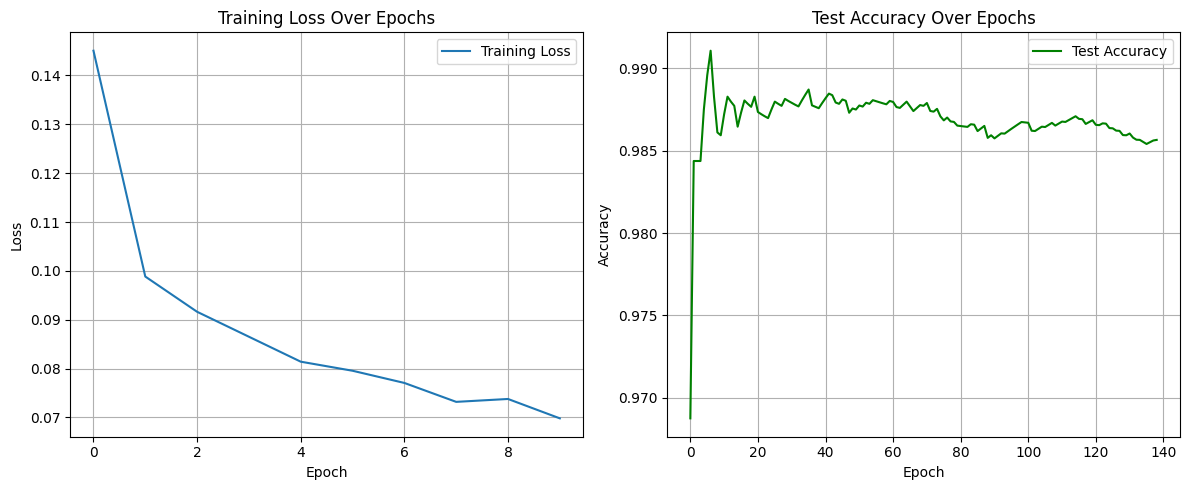

In [54]:
plt.figure(figsize=(12, 5))

# Plot Loss
plt.subplot(1, 2, 1)
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.grid(True)
plt.legend()

# Plot Accuracy
plt.subplot(1, 2, 2)
plt.plot(accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.grid(True)
plt.legend()

plt.tight_layout()
plt.show()

In [59]:
class_names = ["True", "Fake"]
print(classification_report(all_labels, all_preds, target_names=class_names))

              precision    recall  f1-score   support

        True       0.98      0.99      0.99      4283
        Fake       0.99      0.98      0.99      4571

    accuracy                           0.99      8854
   macro avg       0.99      0.99      0.99      8854
weighted avg       0.99      0.99      0.99      8854



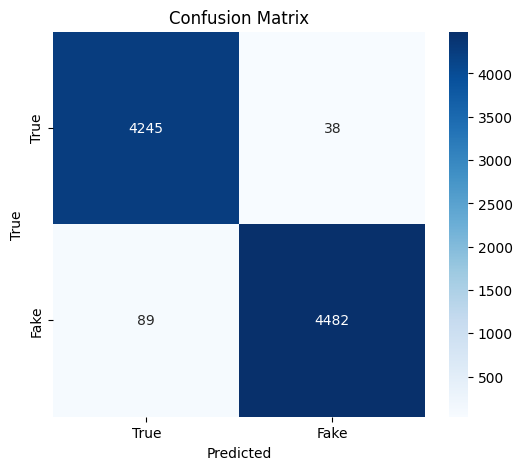

In [60]:
cm = confusion_matrix(all_labels, all_preds)

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=class_names, yticklabels=class_names)
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")
plt.show()

In [61]:
torch.save(model.state_dict(), "News_classifier.pt")
tokenizer.save_pretrained("tokenizer_distilbert")

('tokenizer_distilbert/tokenizer_config.json',
 'tokenizer_distilbert/special_tokens_map.json',
 'tokenizer_distilbert/vocab.txt',
 'tokenizer_distilbert/added_tokens.json')